# Data Analysis Interview Challenge:

### Part 1: Exploratory data analysis

We have to explore the logins.json file, which has timestamps of user logins in a particular geographic area. <br>
Aggregate these logins based on 15 min time intervals, and visualize, and describe the findings. 

We first import the necessary packages to import and read the file. 

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

C:\Users\brian\Anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


We will read both files at the same time to save time for later.

In [2]:
with open("logins.json", "r") as file:
    logins = json.load(file)

Let's look at first 5 data.

In [3]:
df_logins = pd.DataFrame(logins)
df_logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


It appears be year-month-day hr-min-sec. We can verify the type of the variable to be datetime. If not, we can convert it.

In [4]:
df_logins.login_time.dtype

dtype('O')

In [5]:
df_logins.login_time = pd.to_datetime(df_logins.login_time)

In [6]:
df_logins.login_time.dtype

dtype('<M8[ns]')

Now, we can use this to aggregate based on 15 min time intervals.

In [7]:
df_logins['n_log'] = 1

In [8]:
n_log = df_logins.groupby(pd.Grouper(key="login_time", freq="15Min")).sum()

In [9]:
n_log

,n_log
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [10]:
n_log['month'] = n_log.index.month
n_log['day'] = n_log.index.date
n_log['hour'] = n_log.index.hour
n_log['minute'] = n_log.index.minute

In [11]:
n_log

,n_log,month,day,hour,minute
login_time,,,,,
1970-01-01 20:00:00,2,1,1970-01-01,20,0
1970-01-01 20:15:00,6,1,1970-01-01,20,15
1970-01-01 20:30:00,9,1,1970-01-01,20,30
1970-01-01 20:45:00,7,1,1970-01-01,20,45
1970-01-01 21:00:00,1,1,1970-01-01,21,0
...,...,...,...,...,...
1970-04-13 17:45:00,5,4,1970-04-13,17,45
1970-04-13 18:00:00,5,4,1970-04-13,18,0
1970-04-13 18:15:00,2,4,1970-04-13,18,15


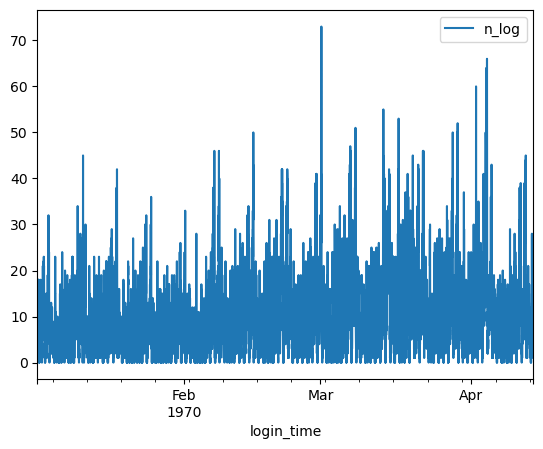

In [12]:
n_log.plot.line(y='n_log')
plt.show()

As you can see, the login counts are periodic. We can zoom in more to see the pattern more clearly and different months. 

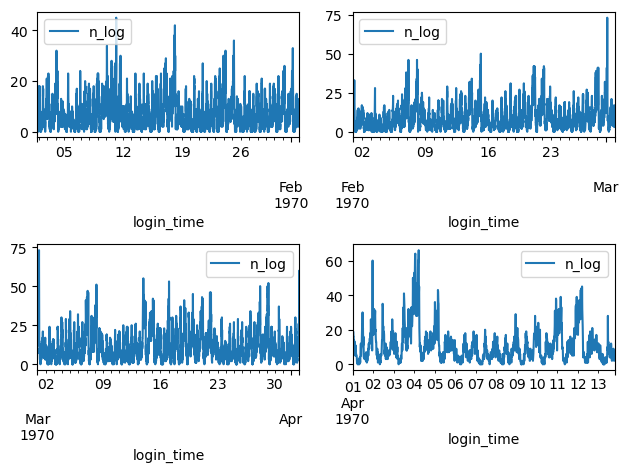

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2)
n_log['1970-01-01':'1970-02-01'].plot.line(y='n_log', ax=ax[0,0])
n_log['1970-02-01':'1970-03-01'].plot.line(y='n_log', ax=ax[0,1])
n_log['1970-03-01':'1970-04-01'].plot.line(y='n_log',ax=ax[1,0])
n_log['1970-04-01':'1970-05-01'].plot.line(y='n_log', ax=ax[1,1])
plt.tight_layout()
plt.show()

Or we can visualize one day.

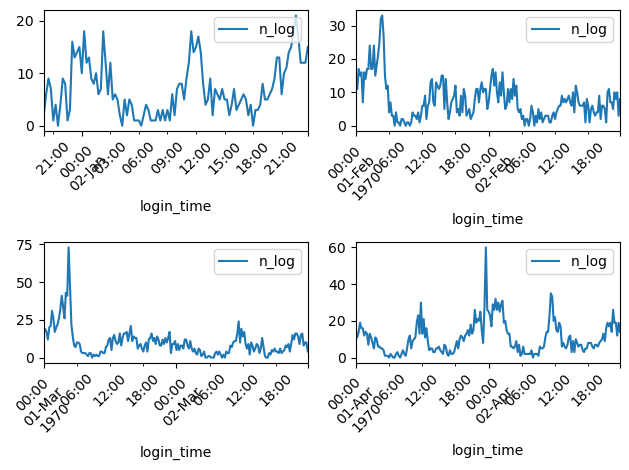

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2)
n_log['1970-01-01':'1970-01-02'].plot.line(y='n_log', ax=ax[0,0], rot=45)
n_log['1970-02-01':'1970-02-02'].plot.line(y='n_log', ax=ax[0,1], rot=45)
n_log['1970-03-01':'1970-03-02'].plot.line(y='n_log',ax=ax[1,0], rot=45)
n_log['1970-04-01':'1970-04-02'].plot.line(y='n_log', ax=ax[1,1], rot=45)
plt.tight_layout()
plt.show()

As menteioned before, there is a cycle. However, there is no consistent daily cycles.

### Part 2: Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities
<br></br>
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

I would choose the frequency of logins as the key measure of success. The reason is by tracking the frequency of logins in each geographical region, we can deduce whether drivers cross the regional boundaries day and night. In my opinion, the frequency of logins in Ultimate Gotham should be increased during the day. Also, the increase in the frequency of logins in Ultimate Metropolis should increase at night. 

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: <br>
    a) how you will implement the experiment <br>
    b) what statistical test(s) you will conduct to verify the significance of the observation <br>
    c) how you would interpret the results and provide recommendations to the city operations team along with any caveats. <br>

a) The frequency of logins can be tracked already as seen in the data between the each geographical region (Ultimate Gotham and Ultimate Metropolis) and time (day and night). The differences can be observed and p-value can be calculated for each city at day and night before and after the implementation of free-toll pass to validate the significance. <br></br>
b) It can be as simple as t-test. <br></br> direction of change and the size. 
c) If the t-test is significant, then the frequency of day or night depending on each city increased, which means there are more drivers crossing into the other city. 

### Part 3: Predictive Modeling

Ultimate is interested in ride retention and we have to use the data to understand which factors correlate to ride retention. <br></br>
<b> The ride retention is considered if the user is active in the proceeding 30 days. </b>  

In [15]:
with open("ultimate_data_challenge.json", "r") as file:
    data = json.load(file)

In [16]:
df_data = pd.DataFrame(data)
df_data.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In the data, we can see various types of features, ranging from integers, floats, True/False (boolean), and strings for different categories. We can verify this by using .info()

In [17]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Here, you can also observe there there are null values in avg_rating_of_driver, phone, and avg_rating_by_driver.

First, we should convert the types of these variables.

In [18]:
df_data.city = df_data.city.astype('category')
df_data.signup_date = pd.to_datetime(df_data.signup_date)
df_data.last_trip_date = pd.to_datetime(df_data.last_trip_date)
df_data.phone = df_data.phone.astype('category')
# Last part turns True -> 1 and False -> 0
df_data.ultimate_black_user = df_data.ultimate_black_user.apply(lambda x:int(x==True))

In [19]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  category      
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  category      
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  int64         
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: category(2), datetime64[ns](2), float64(6),

In [20]:
df_data.describe().T

,count,mean,min,25%,50%,75%,max,std
trips_in_first_30_days,50000.0,2.2782,0.0,0.0,1.0,3.0,125.0,3.792684
signup_date,50000,2014-01-16 13:04:20.352000,2014-01-01 00:00:00,2014-01-09 00:00:00,2014-01-17 00:00:00,2014-01-24 00:00:00,2014-01-31 00:00:00,NaN
avg_rating_of_driver,41878.0,4.601559,1.0,4.3,4.9,5.0,5.0,0.617338
avg_surge,50000.0,1.074764,1.0,1.0,1.0,1.05,8.0,0.222336
last_trip_date,50000,2014-04-19 08:02:04.992000256,2014-01-01 00:00:00,2014-02-14 00:00:00,2014-05-08 00:00:00,2014-06-18 00:00:00,2014-07-01 00:00:00,NaN
surge_pct,50000.0,8.849536,0.0,0.0,0.0,8.6,100.0,19.958811
ultimate_black_user,50000.0,0.37708,0.0,0.0,0.0,1.0,1.0,0.48466
weekday_pct,50000.0,60.926084,0.0,33.3,66.7,100.0,100.0,37.081503
avg_dist,50000.0,5.796827,0.0,2.42,3.88,6.94,160.96,5.707357
avg_rating_by_driver,49799.0,4.778158,1.0,4.7,5.0,5.0,5.0,0.446652


Let's look into the missing variables

In [21]:
df_data[df_data.phone.isna()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
134,King's Landing,0,2014-01-10,5.0,1.00,2014-06-11,NaN,0.0,0,100.0,2.88,5.0
176,Astapor,0,2014-01-28,5.0,1.00,2014-03-18,NaN,0.0,0,100.0,20.32,5.0
320,Astapor,1,2014-01-08,5.0,1.00,2014-01-09,NaN,0.0,0,100.0,31.01,5.0
349,Winterfell,1,2014-01-06,3.3,1.00,2014-06-22,NaN,0.0,1,33.3,6.03,5.0
389,King's Landing,5,2014-01-26,4.9,1.02,2014-07-01,NaN,3.0,0,66.7,3.08,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...
49587,Winterfell,1,2014-01-17,5.0,1.00,2014-01-19,NaN,0.0,1,0.0,1.15,3.0
49627,Astapor,6,2014-01-05,5.0,1.00,2014-01-25,NaN,0.0,1,33.3,3.10,4.5
49666,Winterfell,2,2014-01-22,NaN,1.00,2014-01-23,NaN,0.0,1,100.0,0.73,5.0
49825,Astapor,0,2014-01-25,5.0,1.00,2014-03-10,NaN,0.0,1,50.0,5.82,5.0


In [22]:
df_data[df_data.avg_rating_of_driver.isna()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,0,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,0,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,0,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,0,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,1,100.0,13.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Winterfell,1,2014-01-26,NaN,1.0,2014-01-26,Android,0.0,0,0.0,3.50,5.0
49985,Astapor,1,2014-01-26,NaN,1.0,2014-02-25,Android,0.0,0,100.0,1.38,5.0
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,0,100.0,0.00,5.0
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,0,0.0,0.00,4.0


In [23]:
df_data[df_data.avg_rating_by_driver.isna()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
90,Winterfell,1,2014-01-10,5.0,1.0,2014-02-09,iPhone,0.0,0,0.0,6.28,NaN
274,Astapor,1,2014-01-25,2.0,4.0,2014-02-09,iPhone,100.0,0,0.0,6.00,NaN
277,Winterfell,1,2014-01-25,NaN,1.0,2014-01-26,iPhone,0.0,0,0.0,1.82,NaN
536,Winterfell,1,2014-01-18,5.0,1.0,2014-02-08,Android,0.0,0,100.0,1.41,NaN
857,Winterfell,0,2014-01-11,4.0,1.0,2014-03-16,iPhone,0.0,0,0.0,0.42,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
49249,King's Landing,0,2014-01-14,5.0,1.0,2014-06-19,iPhone,0.0,1,100.0,4.60,NaN
49376,Astapor,1,2014-01-20,4.0,1.0,2014-01-24,iPhone,0.0,0,100.0,3.01,NaN
49504,Winterfell,2,2014-01-24,5.0,1.0,2014-01-25,Android,0.0,0,100.0,0.75,NaN
49599,King's Landing,1,2014-01-14,5.0,1.0,2014-02-08,iPhone,0.0,0,100.0,2.48,NaN


We can also graph the distributions

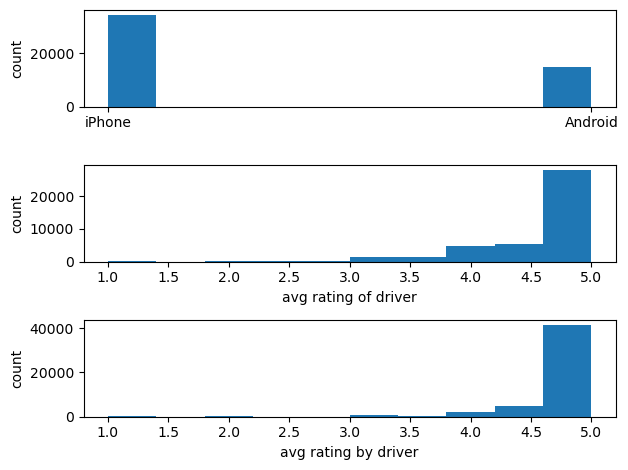

In [24]:
fig, ax = plt.subplots(3,1)
df_data['phone'].hist(ax=ax[0])
df_data['avg_rating_of_driver'].hist(ax=ax[1])
df_data['avg_rating_by_driver'].hist(ax=ax[2])

ax[1].set_xlabel('avg rating of driver')
ax[2].set_xlabel('avg rating by driver')

for i in range(3):
    ax[i].grid(False)
    ax[i].set_ylabel('count')
plt.tight_layout()
plt.show()

We can easily put median, mean, or mode values for missing avg_rating_by_driver and avg_rating_of_driver values. I will choose average value for those variables. <br></br>
We will drop observations with missing phones since there is only about 400 missing.

In [25]:
df_data.avg_rating_by_driver.fillna(df_data.avg_rating_by_driver.mean(),inplace=True)
df_data.avg_rating_of_driver.fillna(df_data.avg_rating_of_driver.mean(),inplace=True)

C:\Users\brian\AppData\Local\Temp\ipykernel_18892\487978453.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data.avg_rating_by_driver.fillna(df_data.avg_rating_by_driver.mean(),inplace=True)
C:\Users\brian\AppData\Local\Temp\ipykernel_18892\487978453.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [26]:
df_data.dropna(subset=['phone'],inplace=True)

In [27]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  category      
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  category      
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  int64         
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: category(2), datetime64[ns](2), float64(6), int6

In [28]:
df_data.describe().T

,count,mean,min,25%,50%,75%,max,std
trips_in_first_30_days,49604.0,2.277256,0.0,0.0,1.0,3.0,125.0,3.7933
signup_date,49604,2014-01-16 13:02:24.859285760,2014-01-01 00:00:00,2014-01-09 00:00:00,2014-01-17 00:00:00,2014-01-24 00:00:00,2014-01-31 00:00:00,NaN
avg_rating_of_driver,49604.0,4.601482,1.0,4.5,4.7,5.0,5.0,0.565227
avg_surge,49604.0,1.074991,1.0,1.0,1.0,1.05,8.0,0.222666
last_trip_date,49604,2014-04-19 11:13:41.836948480,2014-01-01 00:00:00,2014-02-14 18:00:00,2014-05-08 00:00:00,2014-06-18 00:00:00,2014-07-01 00:00:00,NaN
surge_pct,49604.0,8.875314,0.0,0.0,0.0,8.7,100.0,19.989018
ultimate_black_user,49604.0,0.375212,0.0,0.0,0.0,1.0,1.0,0.484182
weekday_pct,49604.0,60.883832,0.0,33.3,66.7,100.0,100.0,37.086239
avg_dist,49604.0,5.785418,0.0,2.42,3.88,6.93,160.96,5.669709
avg_rating_by_driver,49604.0,4.777862,1.0,4.7,5.0,5.0,5.0,0.44622


We will turn city category into a dummy variables with dtype of float. <br></br>
For phone, we can turn Android as 0 and iPhone as 1.

In [29]:
df_data_dummies = pd.get_dummies(data=df_data,columns=['city'],dtype=float)

In [30]:
df_data_dummies['phone'] = df_data_dummies.phone.apply(lambda x: 0 if x == 'Android' else 1)

In [31]:
df_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49604 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  49604 non-null  int64         
 1   signup_date             49604 non-null  datetime64[ns]
 2   avg_rating_of_driver    49604 non-null  float64       
 3   avg_surge               49604 non-null  float64       
 4   last_trip_date          49604 non-null  datetime64[ns]
 5   phone                   49604 non-null  category      
 6   surge_pct               49604 non-null  float64       
 7   ultimate_black_user     49604 non-null  int64         
 8   weekday_pct             49604 non-null  float64       
 9   avg_dist                49604 non-null  float64       
 10  avg_rating_by_driver    49604 non-null  float64       
 11  city_Astapor            49604 non-null  float64       
 12  city_King's Landing     49604 non-null  float64    

Lastly, let's define the retained variable since it can be 0 or 1 for not retained and retained. The last trip date is 2014 july, which means the data is pulled on that date. We will consider users "retained" if they took a ride in June. If not, then not retained. 

In [32]:
df_data_dummies['retained'] = df_data_dummies.last_trip_date.dt.month.apply(lambda x: 1 if x == 6 else 0 )

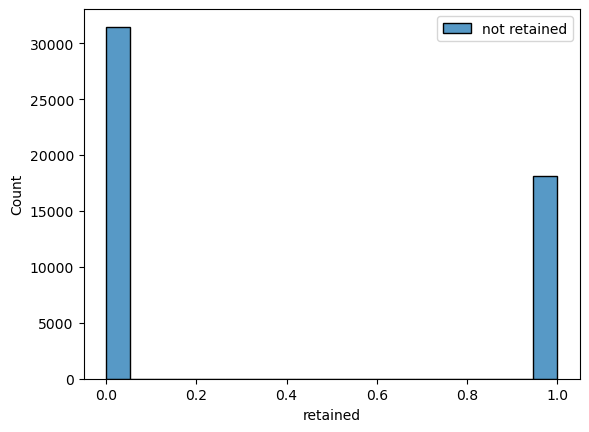

In [33]:
sns.histplot(data=df_data_dummies,x='retained')
plt.legend(['not retained','retained'])
plt.show()

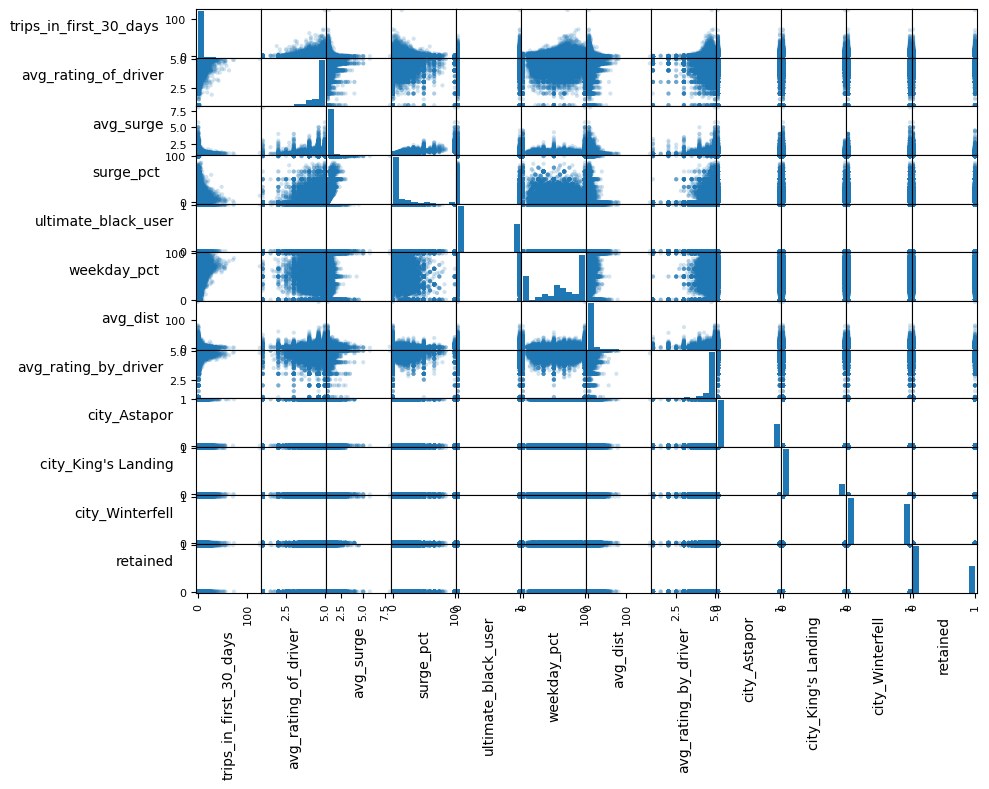

In [34]:
axes = pd.plotting.scatter_matrix(df_data_dummies, alpha=0.2, figsize=(10,8))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

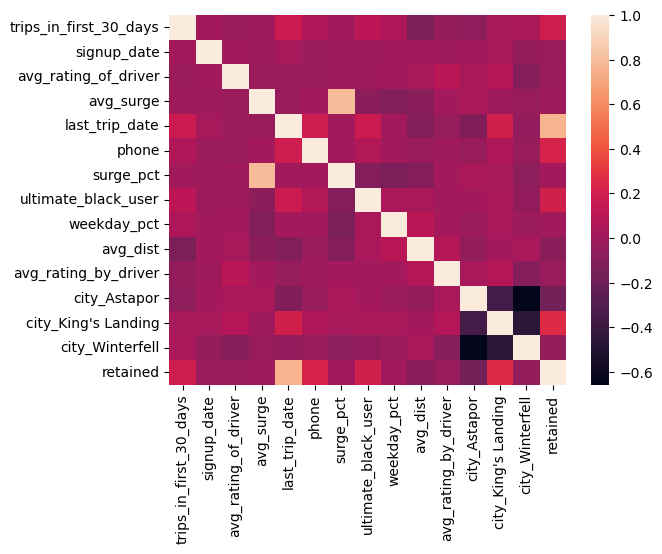

In [35]:
sns.heatmap(df_data_dummies.corr())
plt.show()

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df_data_dummies.drop(columns=['signup_date','last_trip_date','retained']))

In [37]:
pca = PCA().fit(scaled_df)

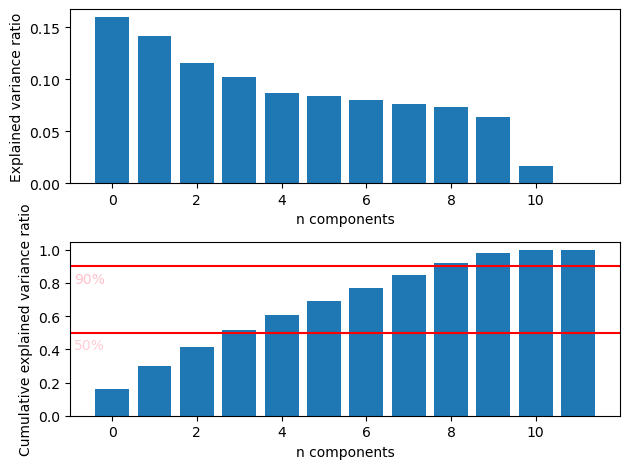

In [38]:
fig, ax = plt.subplots(2,1)
ax[0].bar(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
ax[1].bar(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_.cumsum())
ax[0].set_xlabel('n components')
ax[0].set_ylabel('Explained variance ratio')
ax[1].set_xlabel('n components')
ax[1].set_ylabel('Cumulative explained variance ratio')
ax[1].axhline(0.9,c='r')
ax[1].text(-0.9,0.8,'90%',c='pink')
ax[1].axhline(0.5,c='r')
ax[1].text(-0.9,0.4,'50%',c='pink',alpha=0.8)
plt.tight_layout()
plt.show()

In [39]:
X = scaled_df
X_pca = PCA(n_components=8).fit_transform(scaled_df)
y = df_data_dummies.retained.values
y_pca = df_data_dummies.retained.values

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29762, 12)
(19842, 12)
(29762,)
(19842,)


In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
LR = LogisticRegression(random_state=42)

In [43]:
LR_model = LR.fit(X_train, y_train)
LR_model.score(X_train,y_train)

0.7179625025199919

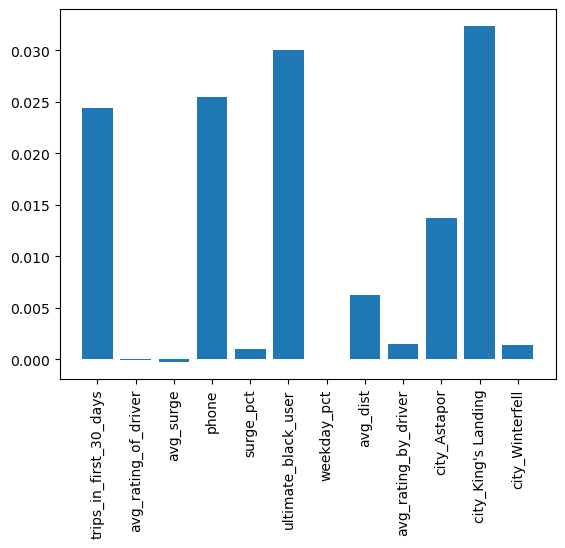

In [44]:
from sklearn.inspection import permutation_importance
LR_model_fi = permutation_importance(LR_model, X_train, y_train)

plt.bar(df_data_dummies.drop(columns=['signup_date','last_trip_date','retained']).columns,LR_model_fi['importances_mean'])
plt.xticks(rotation=90)
plt.show()

In [45]:
pred = LR_model.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

accuracy = accuracy_score(y_test,pred)
mse = mean_squared_error(y_test,pred)
rsq = r2_score(y_test,pred)
print('accuracy: ', accuracy)
print('mean squared error: ', mse)
print('r squared: ', rsq)

accuracy:  0.7134361455498438
mean squared error:  0.28656385445015625
r squared:  -0.23439319095599465


In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR, X, y, cv=3)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.71629876 0.71188388 0.71876134]
0.72 accuracy with a standard deviation of 0.00


In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'C': np.logspace(-4, 4, 20),
    'solver': ["lbfgs", "liblinear", "newton-cg"],
    'penalty': ['l2'],
    'max_iter': [100]
}


GS_LR = GridSearchCV(estimator=LR, param_grid=param_grid,cv=3)
GS_LR.fit(X, y)
print(GS_LR.best_params_)

{'C': 0.0018329807108324356, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [49]:
LR = LogisticRegression(C=GS_LR.best_params_['C'],max_iter=GS_LR.best_params_['max_iter'],penalty=GS_LR.best_params_['penalty'],solver=GS_LR.best_params_['solver'],random_state=42)
LR_model = LR.fit(X_train, y_train)
print(LR_model.score(X_train,y_train))
scores = cross_val_score(LR, X, y, cv=3)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.7177609031651099
[0.71787118 0.71200484 0.71870086]
0.72 accuracy with a standard deviation of 0.00


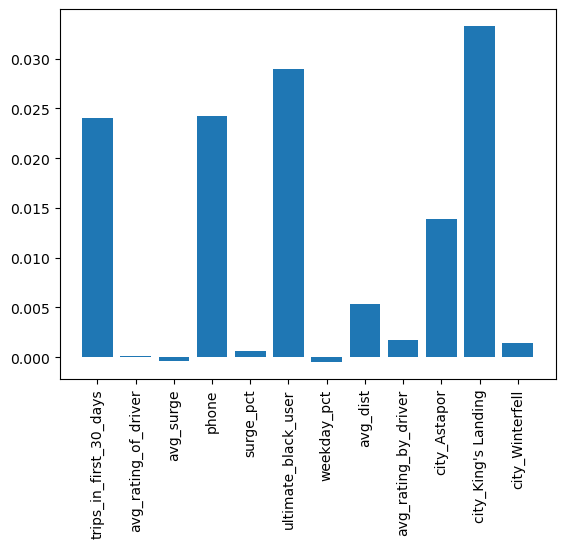

In [50]:
LR_model_fi = permutation_importance(LR_model, X_train, y_train)

plt.bar(df_data_dummies.drop(columns=['signup_date','last_trip_date','retained']).columns,LR_model_fi['importances_mean'])
plt.xticks(rotation=90)
plt.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf_classifier = RandomForestClassifier()

In [53]:
rf_model = rf_classifier.fit(X_train,y_train)
rf_model.score(X_train,y_train)

0.9975808077414152

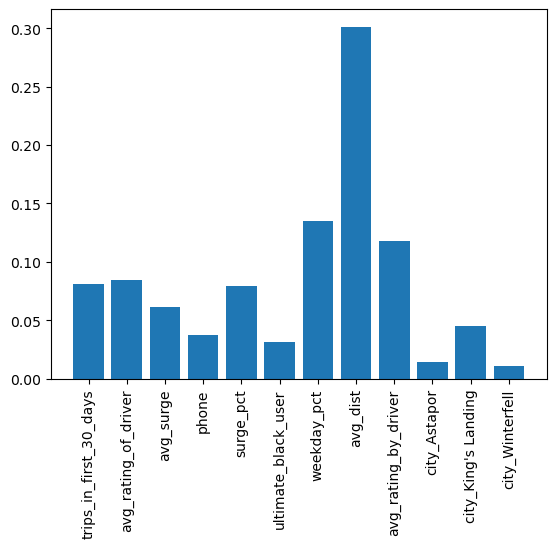

In [54]:
plt.bar(df_data_dummies.drop(columns=['signup_date','last_trip_date','retained']).columns,rf_model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [55]:
pred = rf_model.predict(X_test)

In [56]:
accuracy = accuracy_score(y_test,pred)
mse = mean_squared_error(y_test,pred)
rsq = r2_score(y_test,pred)
print('accuracy: ', accuracy)
print('mean squared error: ', mse)
print('r squared: ', rsq)

accuracy:  0.7485132547122266
mean squared error:  0.2514867452877734
r squared:  -0.08329617004404044


In [57]:
scores = cross_val_score(rf_classifier, X, y, cv=3)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.74333233 0.75034775 0.7501512 ]
0.75 accuracy with a standard deviation of 0.00


In [ ]:
param_grid = { 
    'n_estimators': range(1,100,10),
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': range(1,100,10),
    'max_features': ['sqrt', 'log2', None]
}

GS_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,cv=3)
GS_rf.fit(X, y)
print(GS_rf.best_params_)

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=GS_rf.best_params_['n_estimators'],
                                       criterion=GS_rf.best_params_['criterion'],
                                       max_depth=GS_rf.best_params_['max_depth'],
                                       max_features=GS_rf.best_params_['max_features'])
scores = cross_val_score(rf_classifier, X, y, cv=3)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
rf_model = rf_classifier.fit(X_train,y_train)
rf_model.score(X_train,y_train)

In [ ]:
plt.bar(df_data_dummies.drop(columns=['signup_date','last_trip_date','retained']).columns,rf_model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
gb_model = gb.fit(X_train, y_train)
gb_model.score(X_test, y_test)

In [ ]:
plt.bar(df_data_dummies.drop(columns=['signup_date','last_trip_date','retained']).columns,gb_model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [ ]:
pred = gb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,pred)
mse = mean_squared_error(y_test,pred)
rsq = r2_score(y_test,pred)
print('accuracy: ', accuracy)
print('mean squared error: ', mse)
print('r squared: ', rsq)

In [ ]:
scores = cross_val_score(gb, X, y, cv=3)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
param_grid = { 
    'loss': ['log_loss', 'exponential'],
    'n_estimators': range(1,100,10),
    'learning_rate': np.logspace(-4, 4, 10),
    'max_depth': range(1,100,10),
    'max_features': ['sqrt', 'log2'],
    'criterion': ['friedman_mse', 'squared_error']
}
#n_estimators=100, learning_rate=1.0, max_depth=1
GS_gb = GridSearchCV(estimator=gb, param_grid=param_grid,cv=3)
GS_gb.fit(X, y)
print(GS_gb.best_params_)

In [ ]:
gb = GradientBoostingClassifier(loss=GS_gb.best_params_['loss'],
                                criterion=GS_gb.best_params_['criterion'],
                                n_estimators=GS_gb.best_params_['n_estimators'],
                                learning_rate=GS_gb.best_params_['learning_rate'],
                               max_depth=GS_gb.best_params_['max_depth']
                               max_features=GS_gb.best_params_['max_features']
                               criterion=GS_gb.best_params_['criterion'])
scores = cross_val_score(gb, X, y, cv=3)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
gb_mode = gb.fit(X_train,y_train)

In [ ]:
plt.bar(df_data_dummies.drop(columns=['signup_date','last_trip_date','retained']).columns,gb_model.feature_importances_)
plt.xticks(rotation=90)
plt.show()